# Timeseries in pandas
In this notebook
- get data that into a dataframe 
- convert the appropriate column into time-series

[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview)


In [1]:
import pandas as pd

### Getting Data
There is a lot of useful datasets at
datahub.io

I am going to use the link 
https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv

In [2]:
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv")
df.head(3)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


### What the heck!!!??

In [3]:
fields = ['Date', 'Interpolated']
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv", usecols = fields)
df.head(3)

,Date,Interpolated
1958-03,1958.2027,-1
1958-04,1958.2877,-1
1958-05,1958.3699,-1


##### damn still not working, arrrghhhhhhh

In [4]:
names = ['Date', "DD", "Ave", "Interpolated", "Trend", "Num Days","extra"]
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv",header= None, names = names, skiprows=1)
df.head(3)

,Date,DD,Ave,Interpolated,Trend,Num Days,extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [5]:
df["Date"]

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
805    2025-04
806    2025-05
807    2025-06
808    2025-07
809    2025-08
Name: Date, Length: 810, dtype: object

so we will use [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)


In [6]:
pd.to_datetime(df['Date'])

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
805   2025-04-01
806   2025-05-01
807   2025-06-01
808   2025-07-01
809   2025-08-01
Name: Date, Length: 810, dtype: datetime64[ns]

In [7]:
df["Date"]= pd.to_datetime(df['Date'])

In [8]:
df.head(5)

,Date,DD,Ave,Interpolated,Trend,Num Days,extra
0,1958-03-01,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05-01,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958-06-01,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958-07-01,1958.5370,315.87,315.20,-1,-9.99,-0.99


## Seaborn
is a nice plotting package based on matplot lib

In [9]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Ave'>

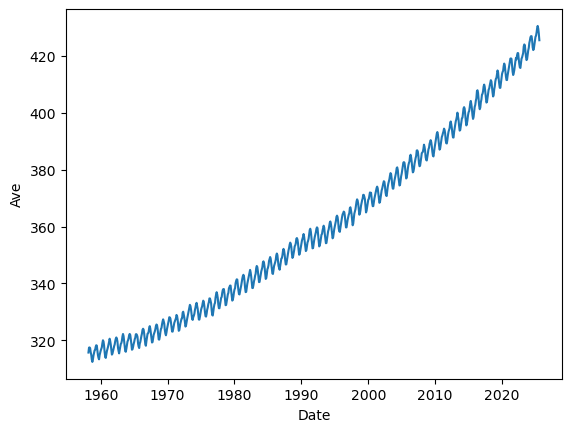

In [10]:
sns.lineplot(data=df, x="Date", y="Ave")

<Axes: xlabel='Date', ylabel='Ave'>

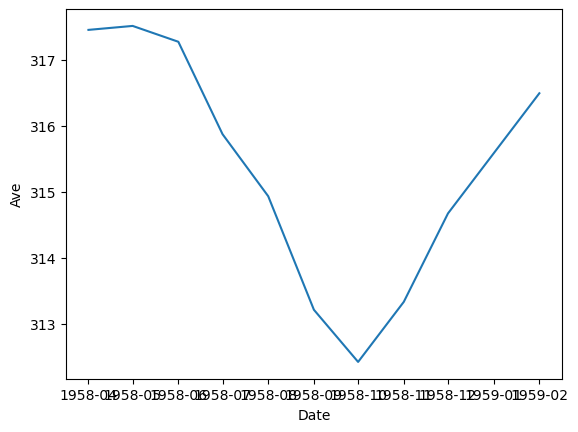

In [11]:
sns.lineplot(data=df.iloc[1:12], x="Date", y="Ave")

<Axes: xlabel='Date', ylabel='Ave'>

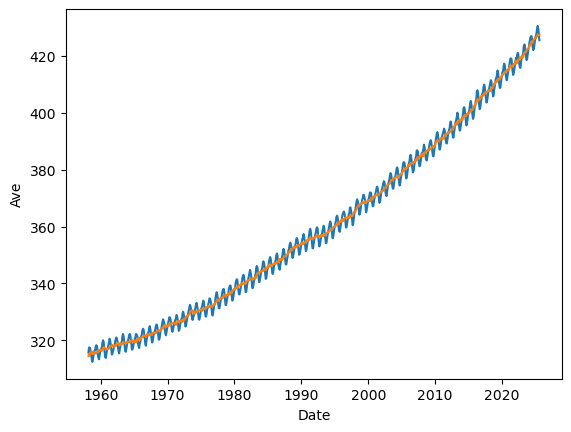

In [12]:
sns.lineplot(data=df, x="Date", y="Ave")
sns.lineplot(data=df, x="Date", y="Interpolated")

## Irish data
Have a look at data.gov.ie
There is lots of data

I am going to look at
Knock airport weather https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv


In [13]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv")
df.head(3)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


##### Whoops 
we need to ignore the first few rows (this is why it is good to inspect the data)

In [ ]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

mmmmm the year and month are in different Columns  
(I am not going to dwell on the holes in the data yet, I talked about that two weeks ago)

In [ ]:
pd.to_datetime(])

###### Arrrrgghhhhhhhhh
Ok lets make a column called day

In [ ]:
df["day"]=1
df.head(3)

In [ ]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

In [ ]:
sns.lineplot(data=df, x="date", y="meant")

### setting the index to the datetime
If you would like to do some analysis on the data based on time, you should set the index of the DataFrame to be the date

In [ ]:
df.set_index('date', inplace=True)
df.head(3)

In [ ]:
sns.lineplot(data=df, x="date", y="meant")

##### lets look at one year
`loc` gets the rols that match the indexes value

In [ ]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="meant")

 remeber `iloc` uses the row (or column) number

In [ ]:
sns.lineplot(data=df.iloc[36:48], x="date", y="meant")

### Get the mean temperature
ie select the row and Column  
*note* Be careful taking the mean of a mean or percentage, this can cause unsound data

In [ ]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
df.loc[dateFrom:dateTo]['meant'].mean()

## Resample
You can resample the date,  
ie break it up into chunks.  
eg plot the average temperatures each year

[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)

A list of the valid frequency strings can be found here

[https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

In [ ]:
df["meant"].resample("YS").mean()

you can use `rolling()` to provide rolling calculations (eg averages)

### Aggregation
`agg()`  
instead of just doing the mean() you can do mulitple operations (even have your own lamba functions)   
[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#aggregation)


In [ ]:
df.head(3)

In [ ]:
rs =df.resample("YE")  # resamples the entire data frame
rs

In [ ]:
rs['meant'].mean()

In [ ]:
rs['meant'].agg(["mean", "std"])

### Conslusion
We are only scratching the surface here.   
There is lots more for you to explore:
- The Documentation
- search for it
- co-pilot or chat-gpt can also give you starts

### References
- https://realpython.com/pandas-dataframe/#working-with-time-series
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime